In [2]:
import pandas as pd
import numpy as np
import re
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# Load the file 
with open('SWOT MOORINGS/Deployment 1/SWOT3-01/V100_SN24635_0075m.txt', 'r') as f:
    lines = f.readlines()

In [4]:
# Base headers (non-binned variables)
base_headers = ['Ens', 'YR', 'MO', 'DA', 'HH', 'MM', 'SS', 'HH',
                'Pit', 'Rol', 'Hea', 'Tem', 'Dep']

# Generating bin headers for Eas, Nor, Ver (1 to 50 in the SWOT1, 1 t)
eas_bins = [f'Eas_{i}' for i in range(1, 41)]
nor_bins = [f'Nor_{i}' for i in range(1, 41)]
ver_bins = [f'Ver_{i}' for i in range(1, 41)]

# Final full column list
column_names = base_headers + eas_bins + nor_bins + ver_bins
expected_cols = len(column_names)

In [5]:
expected_cols 

133

In [6]:
data_lines = lines[22:]

# processed_rows = []

# for line in data_lines:
#     # Split cleanly on whitespace
#     fields = re.split(r'\s+', line.strip())
    
#     # Pad with NaNs if row is short
#     if len(fields) < len(column_names):
#         fields += [np.nan] * (len(column_names) - len(fields))
#     elif len(fields) > len(column_names):
#         fields = fields[:len(column_names)]
    
#     processed_rows.append(fields)

# # Build DataFrame
# df = pd.DataFrame(processed_rows, columns=column_names)

# # Convert all values to numeric, force errors to NaN
# df = df.apply(pd.to_numeric, errors='coerce')

# processed_rows = []

# for line in data_lines:
    # Split by *any* whitespace
    # fields = line.strip().split()

    # # Fill missing values with NaN
    # if len(fields) < expected_cols:
    #     fields += [np.nan] * (expected_cols - len(fields))
    # elif len(fields) > expected_cols:
    #     fields = fields[:expected_cols]

    # processed_rows.append(fields)


data_lines = [line.split() for line in data_lines]
data_lines = [[value for value in row if value not in [None, '', 'NaN']] for row in data_lines]


##### Creating DataFrame #########
df = pd.DataFrame(data_lines, columns=column_names)

# Converting everything to numeric, invalid entries become NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
# processed_rows = []
# for line in data_lines:
#     fields = re.split(r'\s+', line.strip())
#     fields = [field if field != '' else np.nan for field in fields]
    
#     # Pad or truncate to expected number of columns
#     if len(fields) < expected_cols:
#         fields += [np.nan] * (expected_cols - len(fields))
#     elif len(fields) > expected_cols:
#         fields = fields[:expected_cols]
    
#     processed_rows.append(fields)

# # Create DataFrame
# df = pd.DataFrame(processed_rows, columns=column_names)

# # Convert all to numeric where possible
# df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
# Extract velocity bins 1 to 34
velocity_east = df.loc[4:, 'Eas_1':'Eas_34']
# velocity_north = df.loc[4:, 'Eas_35':'Nor_18']
velocity_north = df.loc[4:, 'Eas_36':'Nor_29']
depth = df.loc[4:,'Dep']
year = df.loc[4:, 'YR']
month = df.loc[4:, 'MO']
day = df.loc[4:, 'DA']
# hour = df.loc[4:, 'HH']
hour = df[['HH']].iloc[4:, 0]
minute = df.loc[4:, 'MM']
sec = df.loc[4:, 'SS']
roll = df.loc[4:,'Rol']
pitch = df.loc[4:,'Pit']
heading = df.loc[4:,'Hea']

In [9]:
# df.loc[4:, 'Eas_35':'Nor_18'].shape
velocity_east

,Eas_1,Eas_2,Eas_3,Eas_4,Eas_5,Eas_6,Eas_7,Eas_8,Eas_9,Eas_10,...,Eas_25,Eas_26,Eas_27,Eas_28,Eas_29,Eas_30,Eas_31,Eas_32,Eas_33,Eas_34
4,-101.0,-95.0,-70.0,-55.0,-36.0,-29.0,-43.0,-54.0,-37.0,-37.0,...,90.0,101.0,82.0,59.0,44.0,-25.0,-48.0,-93.0,246.0,293.0
5,-100.0,-101.0,-83.0,-70.0,-50.0,-56.0,-42.0,-38.0,-29.0,-31.0,...,84.0,99.0,83.0,78.0,47.0,-17.0,-33.0,-79.0,220.0,193.0
6,-51.0,-30.0,-8.0,-3.0,-1.0,3.0,11.0,0.0,5.0,22.0,...,39.0,33.0,48.0,39.0,9.0,-25.0,-4.0,-117.0,205.0,272.0
7,23.0,26.0,16.0,19.0,5.0,23.0,-4.0,4.0,38.0,38.0,...,7.0,10.0,28.0,18.0,7.0,-21.0,40.0,24.0,438.0,657.0
8,53.0,34.0,32.0,22.0,0.0,2.0,23.0,47.0,51.0,42.0,...,-81.0,-69.0,-62.0,-36.0,-49.0,-76.0,-23.0,22.0,505.0,716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,77.0,101.0,59.0,-15.0,7.0,57.0,-48.0,-55.0,-6.0,58.0,...,-101.0,-115.0,-126.0,-150.0,-241.0,-92.0,-252.0,-234.0,-26.0,-345.0
7972,110.0,113.0,72.0,63.0,61.0,71.0,-28.0,31.0,107.0,71.0,...,-315.0,-307.0,-378.0,-367.0,-348.0,-246.0,-186.0,-39.0,59.0,-461.0
7973,52.0,59.0,100.0,33.0,36.0,-7.0,97.0,118.0,79.0,47.0,...,229.0,140.0,95.0,115.0,157.0,218.0,325.0,60.0,217.0,108.0
7974,107.0,37.0,92.0,81.0,101.0,97.0,119.0,14.0,-11.0,-9.0,...,-61.0,-61.0,-169.0,-40.0,-44.0,19.0,-23.0,294.0,-31.0,135.0


In [10]:
year = pd.to_numeric(df.loc[4:, 'YR'], errors='coerce').fillna(0).astype(int) + 2000
month = pd.to_numeric(df.loc[4:, 'MO'], errors='coerce').fillna(1).astype(int)
day = pd.to_numeric(df.loc[4:, 'DA'], errors='coerce').fillna(1).astype(int)
hour = pd.to_numeric(df[['HH']].iloc[4:, 0], errors='coerce').fillna(0).astype(int)
minute = pd.to_numeric(df.loc[4:, 'MM'], errors='coerce').fillna(0).astype(int)
sec = pd.to_numeric(df.loc[4:, 'SS'], errors='coerce').fillna(0).astype(int)

# creating time array
time = pd.to_datetime({
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'minute': minute,
    'second': sec
}, errors='coerce')  # coerce invalid rows to NaT

In [15]:
bin_size = 2  # meters
First_bin_range = 4.01
num_bins = 34
instrument_depth = 75  # depth of ADCP instrument in meters

# bins = np.arange(1, num_bins + 1)  # 1 to 34
# bin_depths = instrument_depth - (bins - 0.5) * bin_size

Ntime, NCell = velocity_east.shape
Zbin = -instrument_depth + First_bin_range+ bin_size * (np.linspace(1, NCell, NCell)-0.5)

In [17]:
Zbin

array([-69.99, -67.99, -65.99, -63.99, -61.99, -59.99, -57.99, -55.99,
       -53.99, -51.99, -49.99, -47.99, -45.99, -43.99, -41.99, -39.99,
       -37.99, -35.99, -33.99, -31.99, -29.99, -27.99, -25.99, -23.99,
       -21.99, -19.99, -17.99, -15.99, -13.99, -11.99,  -9.99,  -7.99,
        -5.99,  -3.99])

In [19]:
# Converting DataFrames to NumPy arrays
velocity_east_vals = velocity_east.to_numpy(dtype='float32')
velocity_north_vals = velocity_north.to_numpy(dtype='float32')


# Creating Dataset with depth as coordinate
# ds = xr.Dataset(
#     data_vars={
#         'velocity_east': (['time', 'bin'], velocity_east_vals),
#         'velocity_north': (['time', 'bin'], velocity_north_vals),
#     },
#     coords={
#         'time': time,
#         'bin': bins,
#         'depth': ('bin', bin_depths)  # depth for each bin
#     },
#     attrs={
#         'title': 'ADCP Velocity Data with Depth',
#         'instrument_depth_m': instrument_depth,
#         'bin_size_m': bin_size,
#         'site': 'SWOT1-01',
#         'comment': 'Depth calculated assuming fixed bin size and instrument depth.'
#     }
# )


# Créer un DataArray avec les variables filtrées
ds = xr.Dataset(
data_vars={
        'velocity_east': (["TIME","DEPTH"], velocity_east_vals*10**(-3)), ### convert in m/s
        'velocity_north': (["TIME","DEPTH"], velocity_north_vals*10**(-3)), ### convert in m/s
        'pitch':(["TIME"], pitch),
        'roll':(["TIME"],roll),
        'heading':(["TIME"],heading)
    },
        coords = dict(
            DEPTH = Zbin,
            TIME = time
                )
                )


# Saving to NetCDF
ds.to_netcdf('swot_adcp_data_test.nc')

In [21]:
file = 'swot_adcp_data_test.nc'
ds = xr.open_dataset(file) 
ds

<xarray.Dataset>
Dimensions:         (TIME: 7972, DEPTH: 34)
Coordinates:
  * DEPTH           (DEPTH) float64 -69.99 -67.99 -65.99 ... -7.99 -5.99 -3.99
  * TIME            (TIME) datetime64[ns] 2022-10-27T23:17:30 ... 2023-09-25T...
Data variables:
    velocity_east   (TIME, DEPTH) float32 ...
    velocity_north  (TIME, DEPTH) float32 ...
    pitch           (TIME) float64 ...
    roll            (TIME) float64 ...
    heading         (TIME) float64 ...

In [23]:
start = np.datetime64("2023-03-30")
end = np.datetime64("2023-07-10")

ds_FS = ds.where((ds.TIME >= start) & (ds.TIME <= end), drop=True)

Text(0.5, 0, 'Date')

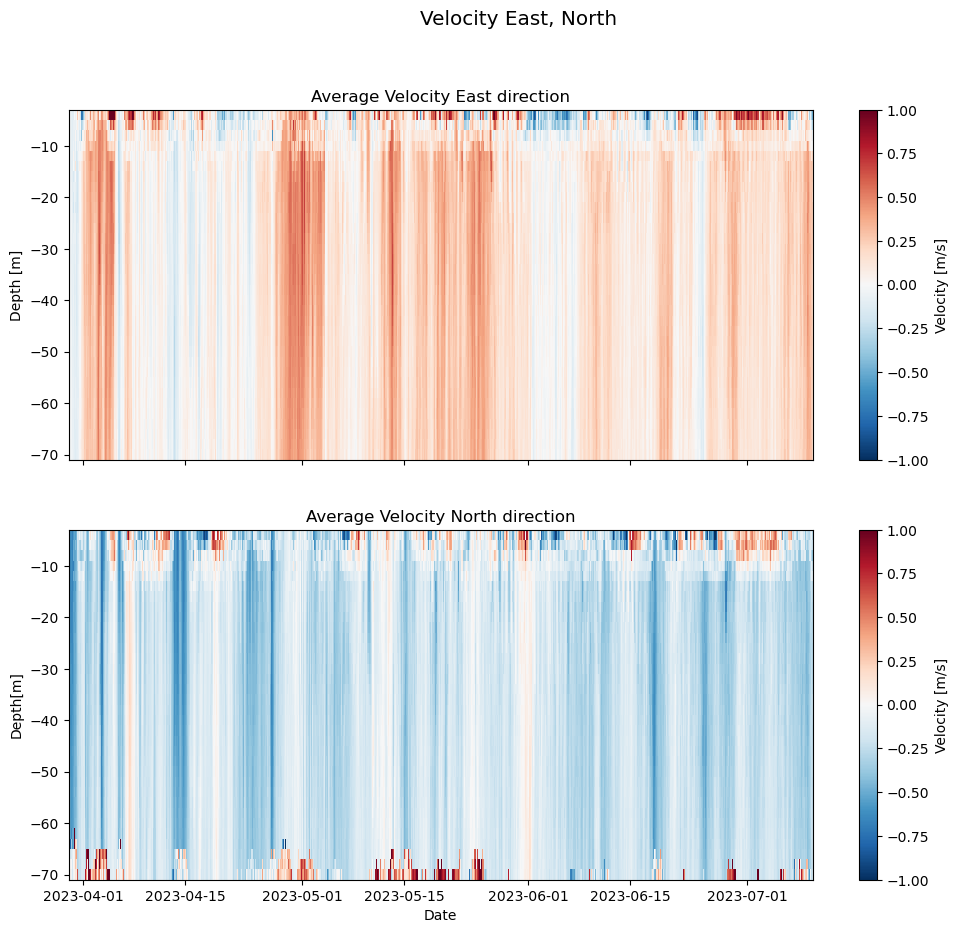

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  #
plt.suptitle('Velocity East, North', size = 'x-large')
pcm0 = axs[0].pcolormesh(ds_FS.TIME, Zbin,ds_FS.velocity_east.T, cmap='RdBu_r', vmin=-1,vmax=1)
axs[0].set_title('Average Velocity East direction')
axs[0].set_ylabel('Depth [m]')
axs[0].set_xticklabels([]) 
cbar0 = plt.colorbar(pcm0, ax=axs[0], label='Velocity [m/s]', shrink=1, pad=0.05)

pcm1 = axs[1].pcolormesh(ds_FS.TIME, Zbin, ds_FS.velocity_north.T, cmap='RdBu_r', vmin=-1,vmax=1)
axs[1].set_title('Average Velocity North direction')
axs[1].set_ylabel('Depth[m]')
cbar1 = plt.colorbar(pcm1, ax=axs[1], label='Velocity [m/s]', shrink=1, pad=0.05)
axs[1].set_xlabel('Date')

In [ ]:
start = np.datetime64("2023-03-30")
end = np.datetime64("2023-07-10")

ds_fast_sampling = ds.where((ds.time >= start) & (ds.time <= end), drop=True)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ds_fast_sampling.time, ds_fast_sampling.velocity_east[:,0]*1e-3);